<a href="https://colab.research.google.com/github/BoranOner/Predicting-Diabetes/blob/main/Sat%C4%B1rVeS%C3%BCtunEksikDengesiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    # visualization library (görselleştirme kütüphanesi)
import seaborn as sns         # visualization library (görselleştirme kütüphanesi)
import missingno as msno      # visualization library (görselleştirme kütüphanesi)
import os

In [430]:
dataFrame = pd.read_csv("https://raw.githubusercontent.com/BoranOner/Predicting-Diabetes/main/diabetes.csv",encoding = 'unicode_escape')

In [431]:
df1 = dataFrame.copy()
df2 = dataFrame.copy()
df3 = dataFrame.copy()

In [432]:
df1 = pd.DataFrame(df1)

In [433]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [434]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [435]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [436]:
df1["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


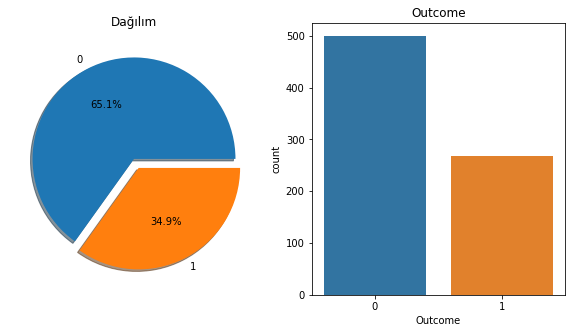

In [437]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df1['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Dağılım')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df1,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [438]:
df1.isnull().sum()  # null değer gözükmüyor

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [439]:
df1.where(df1["Pregnancies"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz

111

In [440]:
df1.where(df1["BloodPressure"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz

35

In [441]:
df1.where(df1["SkinThickness"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz

227

In [442]:
df1.where(df1["Insulin"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz

374

In [443]:
df1.where(df1["BMI"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz

11

In [444]:
df1.where(df1["DiabetesPedigreeFunction"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz

0

In [445]:
df1.where(df1["Age"] == 0).value_counts().sum()        # öznitelikler içindeki sıfır değerleri buluyoruz

0

In [446]:
df1[["Glucose","BloodPressure",
     "BMI"]] = df1[["Glucose","BloodPressure",
     "BMI"]].replace(0,np.NaN)
df1.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

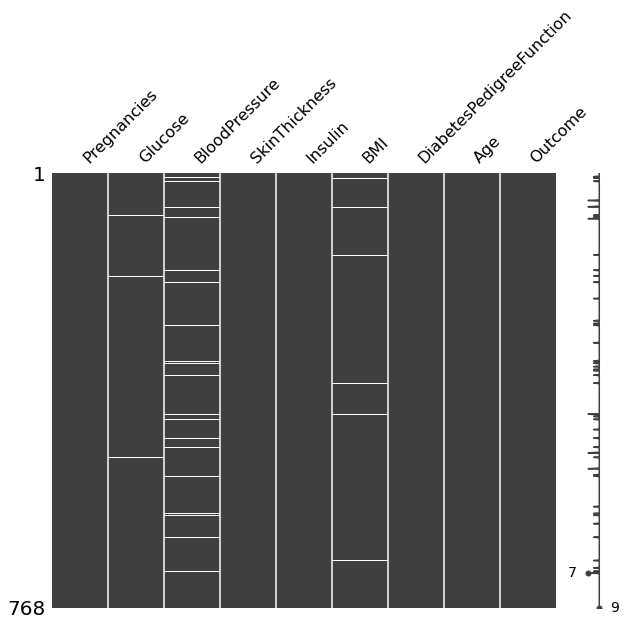

In [447]:
msno.matrix(df1,figsize=(10,8))
plt.show()

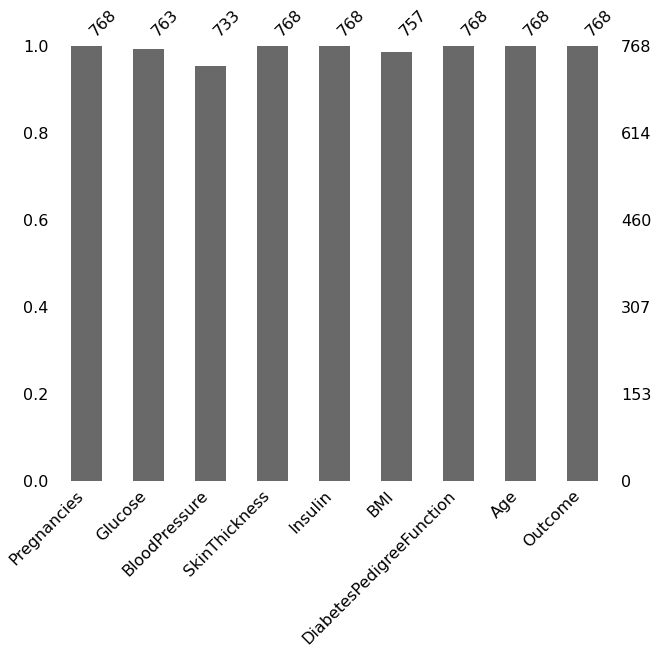

In [448]:
msno.bar(df1,figsize=(10,8))
plt.show()


In [449]:
df1 = df1.drop("Insulin", axis='columns') #çıkarılması gereken sütunlar

In [450]:
df1 = df1.drop("SkinThickness", axis='columns')

In [451]:
df1.dropna(inplace = True)

In [452]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   BMI                       724 non-null    float64
 4   DiabetesPedigreeFunction  724 non-null    float64
 5   Age                       724 non-null    int64  
 6   Outcome                   724 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 45.2 KB


In [453]:
from sklearn.preprocessing import RobustScaler


# Standartlaştırma 
rob_scaler = RobustScaler()
df1['Pregnancies'] = rob_scaler.fit_transform(df1['Pregnancies'].values.reshape(-1,1))
df1['Glucose'] = rob_scaler.fit_transform(df1['Glucose'].values.reshape(-1,1))
df1['BloodPressure'] = rob_scaler.fit_transform(df1['BloodPressure'].values.reshape(-1,1))
df1['BMI'] = rob_scaler.fit_transform(df1['BMI'].values.reshape(-1,1))
df1['DiabetesPedigreeFunction'] = rob_scaler.fit_transform(df1['DiabetesPedigreeFunction'].values.reshape(-1,1))
df1['Age'] = rob_scaler.fit_transform(df1['Age'].values.reshape(-1,1))
df1.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.733728,0.000,0.131868,0.648366,1.235294,1
1,-0.4,-0.757396,-0.375,-0.637363,-0.073203,0.117647,0
2,1.0,1.562130,-0.500,-1.000000,0.766013,0.176471,1
3,-0.4,-0.662722,-0.375,-0.472527,-0.554248,-0.470588,0
4,-0.6,0.473373,-2.000,1.175824,4.990850,0.235294,1


In [454]:
# veri setini train ve test olarak ayırıyoruz

from sklearn.model_selection import train_test_split

X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

In [455]:
y_train.value_counts()  #dengesiz veri seti

0    377
1    202
Name: Outcome, dtype: int64

In [456]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier as randomForest
from sklearn.ensemble import GradientBoostingClassifier as gradientBoosting
import xgboost as xgb
from xgboost import XGBClassifier as xgBoost
from sklearn import svm




gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)

train_pred_gaussianNB = gaussianNB.predict(X_train)
print('Train Accuracy : ',accuracy_score(y_train , train_pred_gaussianNB))

print("Confusion Matrix-GaussianNB-Train: ")
print(confusion_matrix(y_train, train_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gaussianNB))

print("-"*40)

test_pred_gaussianNB = gaussianNB.predict(X_test)
print('Test Accuracy  : ',accuracy_score(y_test, test_pred_gaussianNB))

print("Confusion Matrix-GaussianNB-Test: ")
print(confusion_matrix(y_test, test_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gaussianNB))


Train Accuracy :  0.7823834196891192
Confusion Matrix-GaussianNB-Train: 
[[325  52]
 [ 74 128]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       377
           1       0.71      0.63      0.67       202

    accuracy                           0.78       579
   macro avg       0.76      0.75      0.75       579
weighted avg       0.78      0.78      0.78       579

----------------------------------------
Test Accuracy  :  0.7379310344827587
Confusion Matrix-GaussianNB-Test: 
[[81 17]
 [21 26]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.60      0.55      0.58        47

    accuracy                           0.74       145
   macro avg       0.70      0.69      0.69       145
weighted avg       0.73      0.74      0.73       145



In [457]:
from sklearn.naive_bayes import BernoulliNB

bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train, y_train)

train_pred_bernoulliNB = bernoulliNB.predict(X_train)
print('Train Accuracy : ',accuracy_score(y_train , train_pred_bernoulliNB))

print("Confusion Matrix-BernoulliNB-Train: ")
print(confusion_matrix(y_train, train_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_bernoulliNB))

print("-"*40)


test_pred_bernoulliNB = bernoulliNB.predict(X_test)
print('Test Accuracy  : ',accuracy_score(y_test, test_pred_bernoulliNB))

print("Confusion Matrix-BernoulliNB-Test: ")
print(confusion_matrix(y_test, test_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_bernoulliNB))

Train Accuracy :  0.7184801381692574
Confusion Matrix-BernoulliNB-Train: 
[[296  81]
 [ 82 120]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       377
           1       0.60      0.59      0.60       202

    accuracy                           0.72       579
   macro avg       0.69      0.69      0.69       579
weighted avg       0.72      0.72      0.72       579

----------------------------------------
Test Accuracy  :  0.7586206896551724
Confusion Matrix-BernoulliNB-Test: 
[[83 15]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        98
           1       0.64      0.57      0.61        47

    accuracy                           0.76       145
   macro avg       0.72      0.71      0.72       145
weighted avg       0.75      0.76      0.75       145



In [458]:
from sklearn.linear_model import LogisticRegression



logisticRegression = LogisticRegression(random_state=123456)
logisticRegression.fit(X_train, y_train)

train_pred_logisticRegression = logisticRegression.predict(X_train)
print('Train Accuracy : ',accuracy_score(y_train , train_pred_logisticRegression))

print("Confusion Matrix-LogisticRegression-Train: ")
print(confusion_matrix(y_train, train_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_logisticRegression))

print("-"*40)

test_pred_logisticRegression = logisticRegression.predict(X_test)
print('Test Accuracy  : ',accuracy_score(y_test, test_pred_logisticRegression))

print("Confusion Matrix-LogisticRegression-Test: ")
print(confusion_matrix(y_test, test_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_logisticRegression))


Train Accuracy :  0.7841105354058722
Confusion Matrix-LogisticRegression-Train: 
[[335  42]
 [ 83 119]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       377
           1       0.74      0.59      0.66       202

    accuracy                           0.78       579
   macro avg       0.77      0.74      0.75       579
weighted avg       0.78      0.78      0.78       579

----------------------------------------
Test Accuracy  :  0.7586206896551724
Confusion Matrix-LogisticRegression-Test: 
[[86 12]
 [23 24]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        98
           1       0.67      0.51      0.58        47

    accuracy                           0.76       145
   macro avg       0.73      0.69      0.70       145
weighted avg       0.75      0.76      0.75       145



In [459]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

train_pred_decision_tree = decision_tree.predict(X_train)
print('Train Accuracy : ',accuracy_score(y_train , train_pred_decision_tree))

print("Confusion Matrix-DecisionTreeClassifier-Train: ")
print(confusion_matrix(y_train, train_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_decision_tree))

print("-"*40)

test_pred_decision_tree = decision_tree.predict(X_test)
print('Test Accuracy  : ',accuracy_score(y_test, test_pred_decision_tree))

print("Confusion Matrix-DecisionTreeClassifier-Test: ")
print(confusion_matrix(y_test, test_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_decision_tree))


Train Accuracy :  1.0
Confusion Matrix-DecisionTreeClassifier-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  :  0.6758620689655173
Confusion Matrix-DecisionTreeClassifier-Test: 
[[68 30]
 [17 30]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        98
           1       0.50      0.64      0.56        47

    accuracy                           0.68       145
   macro avg       0.65      0.67      0.65       145
weighted avg       0.70      0.68      0.68       145



In [492]:
rf = randomForest().fit(X_train,y_train)

train_pred_rf = rf.predict(X_train)
print('Train Accuracy : ',accuracy_score(y_train , train_pred_rf))
print("Confusion Matrix-randomForest-Train: ")
print(confusion_matrix(y_train, train_pred_rf))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_rf))

print("-"*40)

test_pred_rf = rf.predict(X_test)
print('Test Accuracy  : ',accuracy_score(y_test, test_pred_rf))

print("Confusion Matrix-randomForest-Test: ")
print(confusion_matrix(y_test, test_pred_rf))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_rf))

Train Accuracy :  1.0
Confusion Matrix-randomForest-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  :  0.7655172413793103
Confusion Matrix-randomForest-Test: 
[[84 14]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        98
           1       0.66      0.57      0.61        47

    accuracy                           0.77       145
   macro avg       0.73      0.72      0.72       145
weighted avg       0.76      0.77      0.76       145



In [461]:
gradientBoosting = gradientBoosting()
gradientBoosting.fit(X_train,y_train)

train_pred_gradientBoosting = gradientBoosting.predict(X_train)
print('Train Accuracy : ',accuracy_score(y_train , train_pred_gradientBoosting))

print("Confusion Matrix-gradientBoosting-Train: ")
print(confusion_matrix(y_train, train_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gradientBoosting))

print("-"*40)

test_pred_gradientBoosting = gradientBoosting.predict(X_test)
print('Test Accuracy  : ',accuracy_score(y_test, test_pred_gradientBoosting))

print("Confusion Matrix-gradientBoosting-Test: ")
print(confusion_matrix(y_test, test_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gradientBoosting))

Train Accuracy :  0.92573402417962
Confusion Matrix-gradientBoosting-Train: 
[[368   9]
 [ 34 168]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       377
           1       0.95      0.83      0.89       202

    accuracy                           0.93       579
   macro avg       0.93      0.90      0.92       579
weighted avg       0.93      0.93      0.92       579

----------------------------------------
Test Accuracy  :  0.7448275862068966
Confusion Matrix-gradientBoosting-Test: 
[[81 17]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        98
           1       0.61      0.57      0.59        47

    accuracy                           0.74       145
   macro avg       0.71      0.70      0.70       145
weighted avg       0.74      0.74      0.74       145



In [462]:
xgBoost = xgBoost(use_label_encoder=False,eval_metric = 'error')
xgBoost.fit(X_train,y_train)

train_pred_xgBoost = xgBoost.predict(X_train)
print('Train Accuracy : ',accuracy_score(y_train , train_pred_xgBoost))

print("Confusion Matrix-xgBoost-Train: ")
print(confusion_matrix(y_train, train_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_xgBoost))

print("-"*40)

test_pred_xgBoost = xgBoost.predict(X_test)
print('Test Accuracy  : ',accuracy_score(y_test, test_pred_xgBoost))

print("Confusion Matrix-xgBoost-Test: ")
print(confusion_matrix(y_test, test_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_xgBoost))

Train Accuracy :  0.8877374784110535
Confusion Matrix-xgBoost-Train: 
[[354  23]
 [ 42 160]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       377
           1       0.87      0.79      0.83       202

    accuracy                           0.89       579
   macro avg       0.88      0.87      0.87       579
weighted avg       0.89      0.89      0.89       579

----------------------------------------
Test Accuracy  :  0.7310344827586207
Confusion Matrix-xgBoost-Test: 
[[81 17]
 [22 25]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.60      0.53      0.56        47

    accuracy                           0.73       145
   macro avg       0.69      0.68      0.68       145
weighted avg       0.72      0.73      0.73       145



In [463]:
X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]
X_train_svm, X_test_svm , y_train_svm , y_test_svm = train_test_split(X, y, test_size=0.30, random_state=0)

In [464]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train_svm , y_train_svm)

SVC(kernel='linear')

In [465]:
train_pred_svm = sv.predict(X_train_svm)
print('Train Accuracy : ',accuracy_score(y_train_svm , train_pred_svm))

test_pred_svm = sv.predict(X_test_svm)
print('Test Accuracy  : ',accuracy_score(y_test_svm, test_pred_svm))

Train Accuracy :  0.782608695652174
Test Accuracy  :  0.7706422018348624


In [466]:
print("Confusion Matrix-SVM: ")
print(confusion_matrix(y_test_svm, test_pred_svm))

Confusion Matrix-SVM: 
[[120  24]
 [ 26  48]]


In [467]:
print('\nModel Sonuçları\n')
print(classification_report(y_test_svm, test_pred_svm))


Model Sonuçları

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       144
           1       0.67      0.65      0.66        74

    accuracy                           0.77       218
   macro avg       0.74      0.74      0.74       218
weighted avg       0.77      0.77      0.77       218



In [468]:
#-------------------------------------------------------
# KNN (K-Nearest Neighbors)

In [469]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [470]:
X_train_knn , X_test_knn , y_train_knn , y_test_knn =train_test_split(X,y,test_size=0.30,random_state=0)

In [471]:
knn = KNeighborsClassifier(n_neighbors=8)

In [472]:
knn.fit(X_train_knn , y_train_knn)

KNeighborsClassifier(n_neighbors=8)

In [473]:
print("KNN Training Accuracy:" ,knn.score(X_train_knn , y_train_knn))

KNN Training Accuracy: 0.8122529644268774


In [474]:
print("KNN Test Accuracy:" ,knn.score(X_test_knn , y_test_knn))

KNN Test Accuracy: 0.7293577981651376


In [475]:
pred_knn= knn.predict(X_test_knn)

In [476]:
print("Confusion Matrix-KNN: ")
confusion_matrix(y_test_knn, pred_knn)

Confusion Matrix-KNN: 


array([[119,  25],
       [ 34,  40]])

In [477]:
print(classification_report(y_test_knn, pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       144
           1       0.62      0.54      0.58        74

    accuracy                           0.73       218
   macro avg       0.70      0.68      0.69       218
weighted avg       0.72      0.73      0.72       218



In [478]:
#-------------------------------------------------------
# MLP (Multilayer Perceptron)

In [479]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [480]:
X_train_mlp , X_test_mlp , y_train_mlp , y_test_mlp =train_test_split(X,y,test_size=0.30,random_state=0)

mlp = MLPClassifier(random_state=0 ,max_iter=3000)

In [481]:
mlp.fit(X_train_mlp , y_train_mlp)

MLPClassifier(max_iter=3000, random_state=0)

In [482]:
print("MLP Training Accuracy : " , format(mlp.score(X_train_mlp , y_train_mlp)))
print("\nMLP Test Accuracy     : " , format(mlp.score(X_test_mlp , y_test_mlp)))

MLP Training Accuracy :  0.9624505928853755

MLP Test Accuracy     :  0.7247706422018348


In [483]:
pred_mlp= mlp.predict(X_test_mlp)

In [484]:
print("Confusion Matrix-MLP: ")
print(confusion_matrix(y_test_mlp, pred_mlp))

Confusion Matrix-MLP: 
[[114  30]
 [ 30  44]]


In [485]:
print(classification_report(y_test_mlp, pred_mlp))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       144
           1       0.59      0.59      0.59        74

    accuracy                           0.72       218
   macro avg       0.69      0.69      0.69       218
weighted avg       0.72      0.72      0.72       218



In [486]:
#Best Classification for this Model is RandomForest

In [487]:
params = {"max_depth": [2, 5, 8],
          "max_features": [2, 5, 6],
          "n_estimators": [10, 500, 1000],
          "min_samples_split": [2, 5, 10]}


In [488]:
from sklearn.model_selection import GridSearchCV

In [489]:
cv = GridSearchCV(rf,params,cv=10,verbose=False,n_jobs=-1).fit(X_test,y_test)
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 8, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 10}
0.7780952380952381


In [490]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [496]:
rftuned = randomForest(max_depth=8,max_features=2,min_samples_split=10,n_estimators=500).fit(X_test,y_test)
predicttuned = rftuned.predict(X_test)

R2CVtuned = cross_val_score(rftuned,X_test,y_test,cv=10).mean()
print("cross validation score: " , R2CVtuned)
errortuned = -cross_val_score(rftuned,X_test,y_test,cv=10,scoring="neg_mean_squared_error").mean()
print("Negative mean squared error: " , np.sqrt(errortuned))

cross validation score:  0.7376190476190476
Negative mean squared error:  0.49232200070782167
